# Keystroke Dynamics

### Dataset:
The dataset is taken from http://www.vmonaco.com/keystroke-datasets.
Specifically from https://ms.sapientia.ro/~manyi/keystroke.html.

### To read:
* https://appliedmachinelearning.blog/2017/07/26/user-verification-based-on-keystroke-dynamics-python-code/

## 1. Loading data

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

In [2]:
data = arff.loadarff('dataset2_norm.arff')
df = pd.DataFrame(data[0])

In [3]:
df.columns

Index(['holdtime1', 'holdtime2', 'holdtime3', 'holdtime4', 'holdtime5',
       'holdtime6', 'holdtime7', 'holdtime8', 'holdtime9', 'holdtime10',
       'holdtime11', 'holdtime12', 'holdtime13', 'holdtime14', 'downdown1',
       'downdown2', 'downdown3', 'downdown4', 'downdown5', 'downdown6',
       'downdown7', 'downdown8', 'downdown9', 'downdown10', 'downdown11',
       'downdown12', 'downdown13', 'updown1', 'updown2', 'updown3', 'updown4',
       'updown5', 'updown6', 'updown7', 'updown8', 'updown9', 'updown10',
       'updown11', 'updown12', 'updown13', 'pressure1', 'pressure2',
       'pressure3', 'pressure4', 'pressure5', 'pressure6', 'pressure7',
       'pressure8', 'pressure9', 'pressure10', 'pressure11', 'pressure12',
       'pressure13', 'pressure14', 'fingerarea1', 'fingerarea2', 'fingerarea3',
       'fingerarea4', 'fingerarea5', 'fingerarea6', 'fingerarea7',
       'fingerarea8', 'fingerarea9', 'fingerarea10', 'fingerarea11',
       'fingerarea12', 'fingerarea13', 'fingerar

In [4]:
len(df.columns)

72

In [5]:
df.shape

(2142, 72)

In [6]:
a = df['user_id'].values[:]

In [7]:
type(a)

numpy.ndarray

In [8]:
df.head()

,holdtime1,holdtime2,holdtime3,holdtime4,holdtime5,holdtime6,holdtime7,holdtime8,holdtime9,holdtime10,...,fingerarea9,fingerarea10,fingerarea11,fingerarea12,fingerarea13,fingerarea14,meanholdtime,meanpressure,meanfingerarea,user_id
0,0.538793,0.462222,0.362903,0.274510,0.300366,0.384259,0.430147,0.467290,0.240,0.374429,...,0.296296,0.296296,0.222222,0.211470,0.283154,0.185185,0.447030,0.387546,0.364089,b'1'
1,0.435345,0.382222,0.354839,0.285714,0.106227,0.328704,0.363971,0.485981,0.344,0.365297,...,0.259259,0.185185,0.185185,0.354839,0.211470,0.148148,0.423762,0.445704,0.369322,b'1'
2,0.478448,0.453333,0.399194,0.338936,0.340659,0.375000,0.338235,0.345794,0.296,0.365297,...,0.296296,0.333333,0.222222,0.283154,0.175627,0.185185,0.454455,0.464092,0.371658,b'1'
3,0.396552,0.444444,0.415323,0.338936,0.366300,0.416667,0.404412,0.640187,0.276,0.410959,...,0.370370,0.185185,0.222222,0.283154,0.247312,0.296296,0.522772,0.397230,0.396828,b'1'
4,0.469828,0.453333,0.290323,0.271709,0.340659,0.361111,0.408088,0.635514,0.324,0.378995,...,0.333333,0.222222,0.222222,0.211470,0.318996,0.074074,0.493564,0.455577,0.365646,b'1'


In [9]:
b = np.mean(a == b'37')

In [10]:
2142 * b

51.0

> As it can be seen the number of samples per user are 51. Since the user are 42 users, there in total 51 * 42 = 2142 samples. Number of features is 71.

### Note: the dataset is 2142 * 72.

## 2. Preprocessing 

Good source for Pandas: https://chrisalbon.com/python/data_wrangling/pandas_replace_values/

In [11]:
user_id_unique = df['user_id'].unique()

In [12]:
user_id_unique

array([b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9', b'10', b'20',
       b'21', b'24', b'25', b'26', b'27', b'28', b'29', b'35', b'36',
       b'37', b'38', b'40', b'41', b'50', b'51', b'53', b'54', b'55',
       b'65', b'66', b'68', b'69', b'70', b'71', b'73', b'80', b'81',
       b'82', b'83', b'84', b'85'], dtype=object)

In [13]:
user_id_unique.shape

(42,)

In [14]:
type(user_id_unique)

numpy.ndarray

In [15]:
user_id = df['user_id'].values

In [16]:
user_id.shape

(2142,)

In [17]:
"""
user_id[user_id == b'20'] = b'11'
user_id[user_id == b'21'] = b'12'
user_id[user_id == b'24'] = b'13'
user_id[user_id == b'25'] = b'14'
user_id[user_id == b'26'] = b'15'
user_id[user_id == b'27'] = b'16'
user_id[user_id == b'28'] = b'17'
user_id[user_id == b'29'] = b'18'
user_id[user_id == b'35'] = b'19'
user_id[user_id == b'35'] = b'20'
user_id[user_id == b'37'] = b'21'
user_id[user_id == b'38'] = b'22'
user_id[user_id == b'20'] = b'11'
"""

"\nuser_id[user_id == b'20'] = b'11'\nuser_id[user_id == b'21'] = b'12'\nuser_id[user_id == b'24'] = b'13'\nuser_id[user_id == b'25'] = b'14'\nuser_id[user_id == b'26'] = b'15'\nuser_id[user_id == b'27'] = b'16'\nuser_id[user_id == b'28'] = b'17'\nuser_id[user_id == b'29'] = b'18'\nuser_id[user_id == b'35'] = b'19'\nuser_id[user_id == b'35'] = b'20'\nuser_id[user_id == b'37'] = b'21'\nuser_id[user_id == b'38'] = b'22'\nuser_id[user_id == b'20'] = b'11'\n"

### 2.0.1 Creating Labels (Y)

In [18]:
%time
label = []
for i in range(42):
    for j in range(51):
        label.append(i)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [19]:
y = np.array(label)

In [20]:
y.shape

(2142,)

In [21]:
np.mean(y == 0) * 2142

51.0

In [22]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

### 2.0.2 Input Data (X)

In [23]:
df_x = df.iloc[:,:71]

In [24]:
X = df_x.values

In [25]:
X.shape

(2142, 71)

### 2.1 One Hot Encoding

Source: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

In [26]:
from keras.utils import to_categorical

/home/amanzhol/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [27]:
Y = to_categorical(y)

In [28]:
Y.shape

(2142, 42)

In [29]:
Y[51].shape

(42,)

### 2.2 Splitting the dataset into the Training and Testing

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [32]:
X_train.shape

(1713, 71)

In [33]:
2142 * 0.8

1713.6000000000001

In [34]:
Y_train.shape

(1713, 42)

In [35]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

As it can be seen, train_test_split splits the data randomly.

## 3. Building Neural Network

Source: https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [280]:
#Initializing Neural Network
model = Sequential()

#### Input layer

In [281]:
# Adding the input layer and the first hidden layer
model.add(Dense(units = 15, 
                input_dim = 71, 
                activation = 'relu',))

In [282]:
#model.add(Dropout(0.5))

#### Hidden layer 1

In [283]:
# Adding the second hidden layer
model.add(Dense(units = 15, 
                activation = 'relu'))

In [284]:
#model.add(Dropout(0.5))

#### Hidden layer 2

In [285]:
# Adding the third hidden layer
model.add(Dense(units = 15, 
                activation = 'relu'))

#### Output layer

In [286]:
# Adding the output layer
model.add(Dense(units = 42, 
                activation = 'softmax'))

In [287]:
#Print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 15)                1080      
_________________________________________________________________
dense_41 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_42 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_43 (Dense)             (None, 42)                672       
Total params: 2,232
Trainable params: 2,232
Non-trainable params: 0
_________________________________________________________________


### 3.1 Compilation

In [288]:
from keras import optimizers

In [289]:
sgd = optimizers.SGD(lr = 0.3, momentum = 0.9)

In [290]:
# Compiling Neural Network
model.compile(optimizer = sgd, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

####       Congratulations for myself, I have build my first Deep Learning Neural Network model using Keras with understanding.

### 3.2 Training

In [291]:
#Early Stopping
from keras.callbacks import EarlyStopping

In [292]:
es = EarlyStopping(monitor = 'val_loss', 
                   mode = 'auto', 
                   patience=50, 
                   restore_best_weights = True)

In [293]:
%time
train_history = model.fit(X_train, Y_train, 
                          batch_size = 100, 
                          epochs = 300, 
                          verbose = 2,
                          validation_split = 0.2,
                          #callbacks = [es]
                         )

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 12.4 µs
Train on 1370 samples, validate on 343 samples
Epoch 1/300
 - 1s - loss: 3.7444 - acc: 0.0109 - val_loss: 3.7425 - val_acc: 0.0117
Epoch 2/300
 - 0s - loss: 3.6746 - acc: 0.0175 - val_loss: 3.5947 - val_acc: 0.0466
Epoch 3/300
 - 0s - loss: 3.4328 - acc: 0.0569 - val_loss: 3.3770 - val_acc: 0.0671
Epoch 4/300
 - 0s - loss: 3.2864 - acc: 0.0657 - val_loss: 3.2514 - val_acc: 0.0729
Epoch 5/300
 - 0s - loss: 3.3687 - acc: 0.0620 - val_loss: 3.2085 - val_acc: 0.0641
Epoch 6/300
 - 0s - loss: 3.1574 - acc: 0.0854 - val_loss: 2.9195 - val_acc: 0.1050
Epoch 7/300
 - 0s - loss: 2.8431 - acc: 0.1365 - val_loss: 2.8926 - val_acc: 0.1283
Epoch 8/300
 - 0s - loss: 2.8996 - acc: 0.1292 - val_loss: 3.3235 - val_acc: 0.0875
Epoch 9/300
 - 0s - loss: 3.0917 - acc: 0.1299 - val_loss: 3.0115 - val_acc: 0.0845
Epoch 10/300
 - 0s - loss: 2.8279 - acc: 0.1562 - val_loss: 2.6981 - val_acc: 0.1603
Epoch 11/300
 - 0s - loss: 3.3591 - acc: 0.1

 - 0s - loss: 3.7378 - acc: 0.0307 - val_loss: 3.7704 - val_acc: 0.0117
Epoch 97/300
 - 0s - loss: 3.7372 - acc: 0.0307 - val_loss: 3.7667 - val_acc: 0.0117
Epoch 98/300
 - 0s - loss: 3.7371 - acc: 0.0285 - val_loss: 3.7677 - val_acc: 0.0175
Epoch 99/300
 - 0s - loss: 3.7376 - acc: 0.0277 - val_loss: 3.7686 - val_acc: 0.0117
Epoch 100/300
 - 0s - loss: 3.7362 - acc: 0.0307 - val_loss: 3.7713 - val_acc: 0.0117
Epoch 101/300
 - 0s - loss: 3.7375 - acc: 0.0255 - val_loss: 3.7682 - val_acc: 0.0087
Epoch 102/300
 - 0s - loss: 3.7375 - acc: 0.0277 - val_loss: 3.7674 - val_acc: 0.0117
Epoch 103/300
 - 0s - loss: 3.7377 - acc: 0.0307 - val_loss: 3.7689 - val_acc: 0.0117
Epoch 104/300
 - 0s - loss: 3.7374 - acc: 0.0277 - val_loss: 3.7684 - val_acc: 0.0175
Epoch 105/300
 - 0s - loss: 3.7385 - acc: 0.0263 - val_loss: 3.7692 - val_acc: 0.0117
Epoch 106/300
 - 0s - loss: 3.7373 - acc: 0.0219 - val_loss: 3.7666 - val_acc: 0.0087
Epoch 107/300
 - 0s - loss: 3.7371 - acc: 0.0314 - val_loss: 3.7715 - v

Epoch 192/300
 - 0s - loss: 3.7371 - acc: 0.0307 - val_loss: 3.7677 - val_acc: 0.0117
Epoch 193/300
 - 0s - loss: 3.7365 - acc: 0.0285 - val_loss: 3.7657 - val_acc: 0.0175
Epoch 194/300
 - 0s - loss: 3.7360 - acc: 0.0241 - val_loss: 3.7718 - val_acc: 0.0117
Epoch 195/300
 - 0s - loss: 3.7370 - acc: 0.0307 - val_loss: 3.7725 - val_acc: 0.0117
Epoch 196/300
 - 0s - loss: 3.7363 - acc: 0.0307 - val_loss: 3.7626 - val_acc: 0.0117
Epoch 197/300
 - 0s - loss: 3.7375 - acc: 0.0307 - val_loss: 3.7667 - val_acc: 0.0117
Epoch 198/300
 - 0s - loss: 3.7374 - acc: 0.0307 - val_loss: 3.7664 - val_acc: 0.0117
Epoch 199/300
 - 0s - loss: 3.7367 - acc: 0.0307 - val_loss: 3.7697 - val_acc: 0.0117
Epoch 200/300
 - 0s - loss: 3.7367 - acc: 0.0307 - val_loss: 3.7673 - val_acc: 0.0117
Epoch 201/300
 - 0s - loss: 3.7375 - acc: 0.0307 - val_loss: 3.7695 - val_acc: 0.0117
Epoch 202/300
 - 0s - loss: 3.7372 - acc: 0.0234 - val_loss: 3.7701 - val_acc: 0.0117
Epoch 203/300
 - 0s - loss: 3.7361 - acc: 0.0241 - val

Epoch 288/300
 - 0s - loss: 3.7362 - acc: 0.0307 - val_loss: 3.7736 - val_acc: 0.0117
Epoch 289/300
 - 0s - loss: 3.7369 - acc: 0.0255 - val_loss: 3.7699 - val_acc: 0.0117
Epoch 290/300
 - 0s - loss: 3.7357 - acc: 0.0277 - val_loss: 3.7680 - val_acc: 0.0117
Epoch 291/300
 - 0s - loss: 3.7368 - acc: 0.0270 - val_loss: 3.7694 - val_acc: 0.0087
Epoch 292/300
 - 0s - loss: 3.7383 - acc: 0.0285 - val_loss: 3.7715 - val_acc: 0.0117
Epoch 293/300
 - 0s - loss: 3.7356 - acc: 0.0307 - val_loss: 3.7677 - val_acc: 0.0117
Epoch 294/300
 - 0s - loss: 3.7370 - acc: 0.0307 - val_loss: 3.7630 - val_acc: 0.0117
Epoch 295/300
 - 0s - loss: 3.7371 - acc: 0.0307 - val_loss: 3.7679 - val_acc: 0.0117
Epoch 296/300
 - 0s - loss: 3.7358 - acc: 0.0277 - val_loss: 3.7702 - val_acc: 0.0117
Epoch 297/300
 - 0s - loss: 3.7375 - acc: 0.0270 - val_loss: 3.7662 - val_acc: 0.0087
Epoch 298/300
 - 0s - loss: 3.7366 - acc: 0.0277 - val_loss: 3.7674 - val_acc: 0.0117
Epoch 299/300
 - 0s - loss: 3.7385 - acc: 0.0219 - val

In [294]:
import matplotlib.pyplot as plt

In [295]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

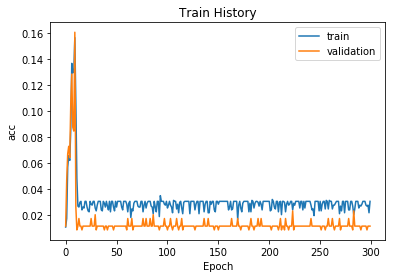

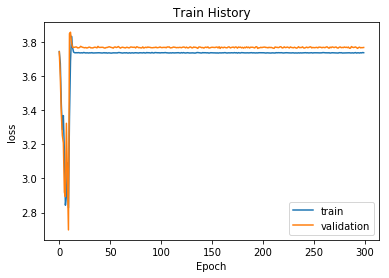

In [296]:
show_train_history(train_history, 'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [297]:
scores = model.evaluate(X_test, Y_test)

429/429 [==============================] - 0s 31us/step


In [298]:
scores[1] * 100

1.1655011655011656

### Before saving: are you sure?

In [201]:
model.save_weights("model_10_10_20_tanh_100_1000_50.h5")
#for this
#https://machinelearningmastery.com/save-load-keras-deep-learning-models/

## MUST-SEE: 
* https://www.kaggle.com/randyrose2017/for-beginners-using-keras-to-build-models
* https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d
* https://medium.com/cracking-the-data-science-interview/a-gentle-introduction-to-neural-networks-for-machine-learning-d5f3f8987786
## Just liked:
* https://missinglink.ai/guides/neural-network-concepts/classification-neural-networks-neural-network-right-choice/
## Full-house:
https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464